In [ ]:
!pip install librosa


In [40]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

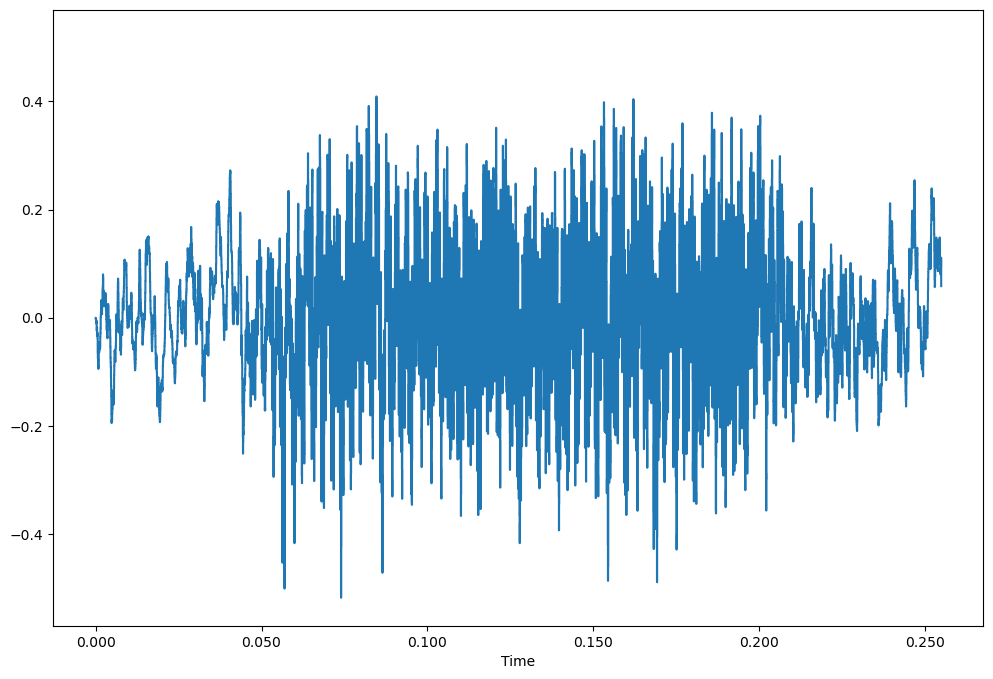

In [2]:
filename='data\car_horn\car_horn_10.wav'
plt.figure(figsize=(12,8))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [3]:
import pandas as pd
import os
import numpy as np
import librosa
from tqdm import tqdm


#Display the confusion matrix
from sklearn.metrics import confusion_matrix

#Transform and encode the categorical targets
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#Split dataset
from sklearn.model_selection import train_test_split


In [4]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
from sklearn import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [5]:
audio_dataset_path='data'


In [6]:
def feature_extraction(file_name):
    try:
        audio, sample_rate = librosa.load(file_name)
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

In [7]:

audio_dataset_path = r'C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data'
audio_folders = {'car_horn': 'car_horn', 'siren': 'siren'}
extracted_features = []

for folder, class_label in audio_folders.items():
    folder_path = os.path.join(audio_dataset_path, folder)
    if os.path.exists(folder_path):
        print(f"Accessing folder: {folder_path}")
        for file_name in tqdm(os.listdir(folder_path), desc=f"Processing {folder} files"):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                print(f"Processing file: {file_path}")
                data = feature_extraction(file_path)
                if data is not None:
                    extracted_features.append([data, class_label])

if extracted_features:
    df = pd.DataFrame(extracted_features, columns=['feature', 'class_label'])
    print(df.head())
else:
    print("No features extracted. Check if files exist and are accessible.")

Accessing folder: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn


Processing car_horn files:   0%|                                                               | 0/200 [00:00<?, ?it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_1.wav


Processing car_horn files:   2%|█                                                      | 4/200 [00:00<00:15, 12.76it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_10.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_100.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_101.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_102.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_103.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_104.wav


Processing car_horn files:   6%|██▉                                                   | 11/200 [00:00<00:07, 24.01it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_105.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_106.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_107.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_108.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_109.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_11.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_110.wav


Processing car_horn files:  10%|█████▏                                                | 19/200 [00:00<00:06, 28.71it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_111.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_112.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_113.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_114.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_115.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_116.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_117.wav


Processing car_horn files:  14%|███████▎                                              | 27/200 [00:01<00:05, 30.22it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_118.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_119.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_12.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_120.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_121.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_122.wav


Processing car_horn files:  16%|████████▎                                             | 31/200 [00:01<00:05, 32.24it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_123.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_124.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_125.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_126.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_127.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_128.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_129.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_13.wav


Processing car_horn files:  20%|██████████▌                                           | 39/200 [00:01<00:04, 33.88it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_130.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_131.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_132.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_133.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_134.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_135.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_136.wav


Processing car_horn files:  24%|████████████▋                                         | 47/200 [00:01<00:04, 31.38it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_137.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_138.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_139.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_14.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_140.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_141.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_142.wav


Processing car_horn files:  28%|██████████████▊                                       | 55/200 [00:01<00:04, 30.90it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_143.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_144.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_145.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_146.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_147.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_148.wav


Processing car_horn files:  30%|████████████████▏                                     | 60/200 [00:02<00:04, 34.89it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_149.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_15.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_150.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_151.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_152.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_153.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_154.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_155.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_156.wav


Processing car_horn files:  34%|██████████████████▎                                   | 68/200 [00:02<00:04, 29.24it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_157.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_158.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_159.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_16.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_160.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_161.wav


Processing car_horn files:  36%|███████████████████▍                                  | 72/200 [00:02<00:04, 30.10it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_162.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_163.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_164.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_165.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_166.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_167.wav


Processing car_horn files:  40%|█████████████████████▎                                | 79/200 [00:02<00:04, 27.79it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_168.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_169.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_17.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_170.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_171.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_172.wav


Processing car_horn files:  42%|██████████████████████▉                               | 85/200 [00:03<00:04, 24.98it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_173.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_174.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_175.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_176.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_177.wav


Processing car_horn files:  46%|████████████████████████▌                             | 91/200 [00:03<00:04, 22.56it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_178.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_179.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_18.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_180.wav


Processing car_horn files:  47%|█████████████████████████▍                            | 94/200 [00:03<00:04, 23.80it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_181.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_182.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_183.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_184.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_185.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_186.wav


Processing car_horn files:  50%|██████████████████████████▌                          | 100/200 [00:03<00:04, 23.44it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_187.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_188.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_189.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_19.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_190.wav


Processing car_horn files:  53%|████████████████████████████                         | 106/200 [00:04<00:04, 22.21it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_191.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_192.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_193.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_194.wav


Processing car_horn files:  55%|████████████████████████████▉                        | 109/200 [00:04<00:04, 21.61it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_195.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_196.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_197.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_198.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_199.wav


Processing car_horn files:  58%|██████████████████████████████▋                      | 116/200 [00:04<00:03, 25.60it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_2.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_20.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_200.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_21.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_22.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_23.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_24.wav


Processing car_horn files:  61%|████████████████████████████████▎                    | 122/200 [00:04<00:02, 26.62it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_25.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_26.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_27.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_28.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_29.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_3.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_30.wav


Processing car_horn files:  65%|██████████████████████████████████▍                  | 130/200 [00:04<00:02, 30.18it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_31.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_32.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_33.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_34.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_35.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_36.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_37.wav


Processing car_horn files:  69%|████████████████████████████████████▌                | 138/200 [00:05<00:01, 32.03it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_38.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_39.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_4.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_40.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_41.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_42.wav


Processing car_horn files:  73%|██████████████████████████████████████▋              | 146/200 [00:05<00:01, 34.45it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_43.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_44.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_45.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_46.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_47.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_48.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_49.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_5.wav


Processing car_horn files:  75%|███████████████████████████████████████▊             | 150/200 [00:05<00:01, 33.94it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_50.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_51.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_52.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_53.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_54.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_55.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_56.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_57.wav


Processing car_horn files:  79%|█████████████████████████████████████████▊           | 158/200 [00:05<00:01, 33.89it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_58.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_59.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_6.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_60.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_61.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_62.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_63.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_64.wav


Processing car_horn files:  83%|███████████████████████████████████████████▉         | 166/200 [00:05<00:00, 36.20it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_65.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_66.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_67.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_68.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_69.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_7.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_70.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_71.wav


Processing car_horn files:  87%|██████████████████████████████████████████████       | 174/200 [00:06<00:00, 35.75it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_72.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_73.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_74.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_75.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_76.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_77.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_78.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_79.wav


Processing car_horn files:  89%|███████████████████████████████████████████████▏     | 178/200 [00:06<00:00, 35.93it/s]C:\Anaconda\envs\dev\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
Processing car_horn files:  91%|████████████████████████████████████████████████▏    | 182/200 [00:06<00:00, 33.69it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_8.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_80.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_81.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_82.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_83.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_84.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_85.wav


Processing car_horn files:  95%|██████████████████████████████████████████████████▎  | 190/200 [00:06<00:00, 33.57it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_86.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_87.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_88.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_89.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_9.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_90.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_91.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_92.wav


Processing car_horn files: 100%|█████████████████████████████████████████████████████| 200/200 [00:06<00:00, 29.13it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_93.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_94.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_95.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_96.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_97.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_98.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\car_horn\car_horn_99.wav


Accessing folder: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren


Processing siren files:   2%|▊                                                         | 3/200 [00:00<00:08, 22.69it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_1.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_10.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_100.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_101.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_102.wav


Processing siren files:   3%|█▋                                                        | 6/200 [00:00<00:08, 22.51it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_103.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_104.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_105.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_106.wav


Processing siren files:   6%|███▍                                                     | 12/200 [00:00<00:09, 20.29it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_107.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_108.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_109.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_11.wav


Processing siren files:   9%|█████▏                                                   | 18/200 [00:00<00:08, 21.88it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_110.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_111.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_112.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_113.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_114.wav


Processing siren files:  10%|█████▉                                                   | 21/200 [00:00<00:07, 23.09it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_115.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_116.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_117.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_118.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_119.wav


Processing siren files:  14%|███████▋                                                 | 27/200 [00:01<00:07, 21.90it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_12.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_120.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_121.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_122.wav


Processing siren files:  15%|████████▌                                                | 30/200 [00:01<00:08, 21.19it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_123.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_124.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_125.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_126.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_127.wav


Processing siren files:  18%|██████████▎                                              | 36/200 [00:01<00:07, 22.02it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_128.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_129.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_13.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_130.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_131.wav


Processing siren files:  20%|███████████                                              | 39/200 [00:01<00:07, 22.39it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_132.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_133.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_134.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_135.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_136.wav


Processing siren files:  22%|████████████▊                                            | 45/200 [00:02<00:06, 23.65it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_137.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_138.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_139.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_14.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_140.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_141.wav


Processing siren files:  26%|██████████████▌                                          | 51/200 [00:02<00:05, 25.15it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_142.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_143.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_144.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_145.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_146.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_147.wav


Processing siren files:  28%|████████████████▏                                        | 57/200 [00:02<00:05, 24.68it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_148.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_149.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_15.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_150.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_151.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_152.wav


Processing siren files:  32%|█████████████████▉                                       | 63/200 [00:02<00:05, 24.69it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_153.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_154.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_155.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_156.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_157.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_158.wav


Processing siren files:  34%|███████████████████▋                                     | 69/200 [00:02<00:05, 23.71it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_159.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_16.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_160.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_161.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_162.wav


Processing siren files:  38%|█████████████████████▍                                   | 75/200 [00:03<00:05, 23.35it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_163.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_164.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_165.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_166.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_167.wav


Processing siren files:  39%|██████████████████████▏                                  | 78/200 [00:03<00:05, 23.53it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_168.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_169.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_17.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_170.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_171.wav


Processing siren files:  42%|███████████████████████▉                                 | 84/200 [00:03<00:04, 23.29it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_172.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_173.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_174.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_175.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_176.wav


Processing siren files:  45%|█████████████████████████▋                               | 90/200 [00:03<00:04, 23.83it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_177.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_178.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_179.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_18.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_180.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_181.wav


Processing siren files:  48%|███████████████████████████▎                             | 96/200 [00:04<00:04, 23.78it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_182.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_183.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_184.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_185.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_186.wav


Processing siren files:  50%|████████████████████████████▏                            | 99/200 [00:04<00:04, 24.43it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_187.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_188.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_189.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_19.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_190.wav


Processing siren files:  52%|█████████████████████████████▍                          | 105/200 [00:04<00:03, 24.42it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_191.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_192.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_193.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_194.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_195.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_196.wav


Processing siren files:  56%|███████████████████████████████                         | 111/200 [00:04<00:03, 24.96it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_197.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_198.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_199.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_2.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_20.wav


Processing siren files:  58%|████████████████████████████████▊                       | 117/200 [00:05<00:03, 24.10it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_200.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_21.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_22.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_23.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_24.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_25.wav


Processing siren files:  62%|██████████████████████████████████▍                     | 123/200 [00:05<00:03, 23.95it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_26.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_27.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_28.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_29.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_3.wav


Processing siren files:  63%|███████████████████████████████████▎                    | 126/200 [00:05<00:03, 23.13it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_30.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_31.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_32.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_33.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_34.wav


Processing siren files:  66%|████████████████████████████████████▉                   | 132/200 [00:05<00:02, 23.12it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_35.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_36.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_37.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_38.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_39.wav


Processing siren files:  69%|██████████████████████████████████████▋                 | 138/200 [00:05<00:02, 22.74it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_4.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_40.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_41.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_42.wav


Processing siren files:  70%|███████████████████████████████████████▍                | 141/200 [00:06<00:02, 22.81it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_43.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_44.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_45.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_46.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_47.wav


Processing siren files:  74%|█████████████████████████████████████████▏              | 147/200 [00:06<00:02, 22.82it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_48.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_49.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_5.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_50.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_51.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_52.wav


Processing siren files:  76%|██████████████████████████████████████████▊             | 153/200 [00:06<00:02, 22.46it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_53.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_54.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_55.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_56.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_57.wav


Processing siren files:  78%|███████████████████████████████████████████▋            | 156/200 [00:06<00:01, 22.27it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_58.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_59.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_6.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_60.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_61.wav


Processing siren files:  81%|█████████████████████████████████████████████▎          | 162/200 [00:06<00:01, 23.12it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_62.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_63.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_64.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_65.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_66.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_67.wav


Processing siren files:  84%|███████████████████████████████████████████████         | 168/200 [00:07<00:01, 23.07it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_68.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_69.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_7.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_70.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_71.wav


Processing siren files:  87%|████████████████████████████████████████████████▋       | 174/200 [00:07<00:01, 22.90it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_72.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_73.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_74.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_75.wav


Processing siren files:  88%|█████████████████████████████████████████████████▌      | 177/200 [00:07<00:01, 21.95it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_76.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_77.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_78.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_79.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_8.wav


Processing siren files:  92%|███████████████████████████████████████████████████▏    | 183/200 [00:07<00:00, 21.29it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_80.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_81.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_82.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_83.wav


Processing siren files:  93%|████████████████████████████████████████████████████    | 186/200 [00:08<00:00, 21.03it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_84.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_85.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_86.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_87.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_88.wav


Processing siren files:  96%|█████████████████████████████████████████████████████▊  | 192/200 [00:08<00:00, 21.69it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_89.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_9.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_90.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_91.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_92.wav


Processing siren files:  98%|██████████████████████████████████████████████████████▌ | 195/200 [00:08<00:00, 21.32it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_93.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_94.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_95.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_96.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_97.wav


Processing siren files: 100%|████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.94it/s]

Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_98.wav
Processing file: C:\Users\harsh\Desktop\MIT WORK\5th Sem\BGT Mini Project\data\siren\siren_99.wav
                                             feature class_label
0  [-188.62563, 102.429115, -2.3306007, -10.94615...    car_horn
1  [-118.649925, 139.0237, -50.672195, 79.94396, ...    car_horn
2  [-164.9663, 100.02073, -37.843723, 15.529125, ...    car_horn
3  [-90.149925, -39.851982, -36.341892, -11.76114...    car_horn
4  [-3.0932195, 111.64565, -39.79511, 2.4852242, ...    car_horn


In [8]:
df = pd.DataFrame(extracted_features, columns=['feature', 'class_label'])
df.head()


,feature,class_label
0,"[-188.62563, 102.429115, -2.3306007, -10.94615...",car_horn
1,"[-118.649925, 139.0237, -50.672195, 79.94396, ...",car_horn
2,"[-164.9663, 100.02073, -37.843723, 15.529125, ...",car_horn
3,"[-90.149925, -39.851982, -36.341892, -11.76114...",car_horn
4,"[-3.0932195, 111.64565, -39.79511, 2.4852242, ...",car_horn


In [9]:
df.tail()

,feature,class_label
395,"[-314.5512, 73.86125, -103.61983, -53.635845, ...",siren
396,"[-397.27167, 43.682404, -70.4187, -32.83924, -...",siren
397,"[-416.50894, 36.491142, -63.0807, -30.7045, -2...",siren
398,"[-332.82928, 68.144455, -95.42792, -51.163948,...",siren
399,"[-265.80508, 128.75638, -71.632515, -30.66356,...",siren


In [10]:
df['class_label'].value_counts()

class_label
car_horn    200
siren       200
Name: count, dtype: int64

In [11]:
# Save the DataFrame to a CSV file
df.to_csv('features_extracted.csv', index=False)


In [12]:

X = np.array(df['feature'].tolist())
Y = np.array(df['class_label'].tolist())

In [13]:
X.shape

(400, 80)

In [14]:

Y.shape

(400,)

In [15]:
# Determine dimensions for reshaping
height = 80  # Number of MFCC coefficients (adjust if needed)
width = 1    # Use 1 for a single frame or segment
channels = 1  # Single channel for grayscale

# Reshape data to be compatible with 2D CNN (samples, height, width, channels)
X = X.reshape(-1, height, width, channels)

In [16]:
# Encode the labels
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [17]:
X.shape

(400, 80, 1, 1)

In [18]:
Y.shape

(400,)

In [19]:
Y[0]

'car_horn'

In [20]:
y[0]

array([1., 0.])

In [21]:
Y[300]

'siren'

In [22]:
y[300]

array([0., 1.])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

In [24]:
X_train.shape

(320, 80, 1, 1)

In [25]:

X_test.shape

(80, 80, 1, 1)

In [26]:
y_train.shape

(320, 2)

In [27]:
y_train.shape[1]

2

In [28]:
y_test.shape

(80, 2)

In [29]:
def build_2d_cnn_model(input_shape, num_classes):
    model = Sequential()
    
    # First Conv2D layer with padding to keep dimensions
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D((1, 1)))  # Adjusted pooling size
    model.add(Dropout(0.5))
    
    # Second Conv2D layer with padding to keep dimensions
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((1, 1)))  # Adjusted pooling size
    model.add(Dropout(0.5))
    
    # Third Conv2D layer with padding to keep dimensions
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((1, 1)))  # Adjusted pooling size
    model.add(Dropout(0.5))
    
    # Flatten the output from the convolutional layers
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [31]:
# Define input shape and number of classes
input_shape = (80, 1, 1)  # Adjust based on your data
num_classes = y_train.shape[1]  # Assuming y_train is your labels

# Build the model
model = build_2d_cnn_model(input_shape, num_classes)


In [32]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 80, 1, 32)           │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 80, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 80, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 80, 1, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 80, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 80, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 80, 1, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 80, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 80, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10240)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,310,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,403,778 (5.35 MB)

 Trainable params: 1,403,778 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [35]:
# Define callbacks
callbacks = [
    ModelCheckpoint('conv2d_model.keras', save_best_only=True, monitor='val_loss', mode='min')
    # EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [36]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=200, 
                    callbacks=callbacks, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.6583 - loss: 0.7841 - val_accuracy: 0.8625 - val_loss: 0.3464
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.7702 - loss: 0.5433 - val_accuracy: 0.8750 - val_loss: 0.3080
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.8443 - loss: 0.3682 - val_accuracy: 0.9625 - val_loss: 0.2652
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8625 - loss: 0.3016 - val_accuracy: 0.9500 - val_loss: 0.2189
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.8546 - loss: 0.3759 - val_accuracy: 0.9625 - val_loss: 0.1884
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.9392 - loss: 0.1904 - val_accuracy: 0.9750 - val_loss: 0.1446
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.9099 - loss: 0.2087 - val_accuracy: 0.9750 - val_loss: 0.1182
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.9293 - loss: 0.1884 - val_accuracy: 0.9750 - v

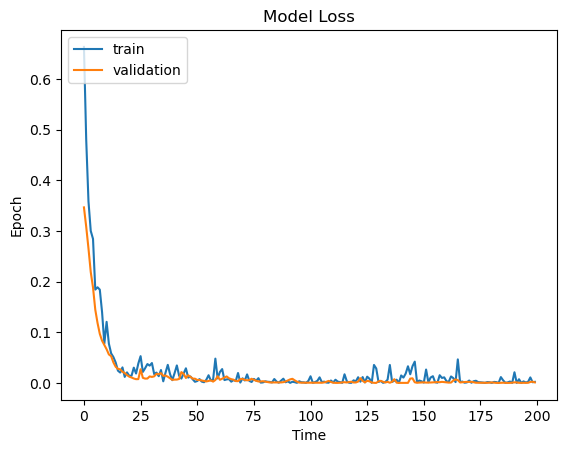

In [37]:
# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [38]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0015
Test Loss: 0.0010939078638330102
Test Accuracy: 1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


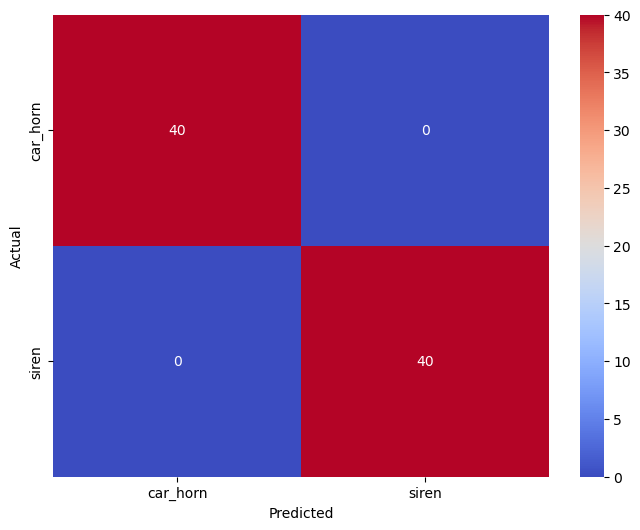

In [41]:
# Predict using your 2D CNN model
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [42]:
model.save('conv2d_model.h5')